In [1]:
import pandas as pd

In [4]:
# read in cell list
df = pd.read_clipboard()

df.rename({'col':'cell_name'},axis=1,inplace=True)

df['sector'] = df['cell_name'].apply(lambda x:x[:6]+x[-1])

cell_list = ['BGMOML1812', 'GDNRML1811', 'GDNRML1812', 'MWBTML1816',
       'ON65ML1811', 'ON65ML1812', 'ON67ML1811', 'ON67ML1812',
       'ON67ML1813', 'ON67ML1816', 'ON88ML1811', 'ON88ML1816',
       'ON88ML1818', 'WDTCML1812', 'WDTCML1813', 'WDTCML1817']

In [24]:
# read in stat
stat = pd.read_csv('../src/STAT_4G_weekly/L2018WK42.csv',header=1)
for i in range(43,50):
    temp = pd.read_csv(f'../src/STAT_4G_weekly/L2018WK{i}.csv',header=1)
    stat = pd.concat([stat,temp],axis=0)
del temp

In [25]:
stat['sector'] = stat['CELL_NAME'].apply(lambda x:x[:6]+x[-1])

In [26]:
stat = stat[stat['sector'].apply(lambda x:x in df['sector'].values)]

In [30]:
stat['label'] = stat['DATE_TIME'].apply(lambda x:'before' if x <45 else 'after')

In [42]:
stat['total_traff'] = stat['AVG_TRAFFIC_DATA_DL'] + stat['AVG_TRAFFIC_DATA_UL']

In [43]:
sum_traff = stat.groupby(['DATE_TIME'])['total_traff'].sum()

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

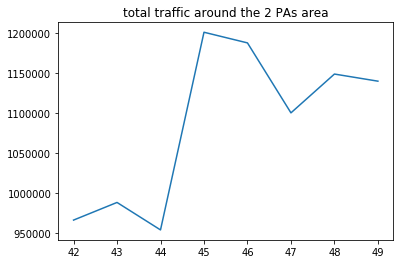

In [60]:
_ = plt.plot(sum_traff)
_ = plt.title('total traffic around the 2 PAs area')

In [61]:
traff_gain = sum_traff[[45,46,47]].mean()- sum_traff[[42,43,44]].mean()
print(traff_gain,'MB')

193315.24999999988 MB
